 # Opis notatnika
 Zmierzamy do końca analizy danych, które zostały nam udostępnione. Ten krok dodaje jeszcze więcej informacji do naszego wyjściowego zbioru. Tym razem sprawdzimy między innymi to, czy opóźnienia lotów zależne są od trasy czy warunków pogodowych.

 Zanim jednak do tego przejdziemy, należy, podobnie jak w poprzednich krokach, skonfigurować odpowiednio notatnik.
 
 W tej części warsztatu ponownie wcielasz się w rolę Analiyka Danych, którego zadaniem jest wykonanie analizy eksplotacyjnej zbioru danych - jedno z wymagań dostarczonych przez klienta.

 Tutaj zaimportuj wymagane biblioteki

In [279]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

 ## Połączenie z bazą danych
 Tutaj uzupełnij konfigurację połączenia

In [149]:
username = 'postgres'
password = 'NoScar11'

host = 'localhost'
database = 'airlines'
port = 5432

 Tutaj stwórz zmienną engine, która zostanie użyta do połączenia z bazą danych

In [150]:
url = f'postgresql+psycopg2://{username}:{password}@{host}:{port}/{database}'
engine = create_engine(url)

 Tutaj uzupełnij implementację metody `read_sql_table`

In [151]:
def read_sql_table(table_name, engine):
    table_name = table_name
    engine = create_engine(f'postgresql+psycopg2://{username}:{password}@{host}:{port}/{database}')
   
    df = pd.read_sql_table(table_name, con=engine)
    return df

 Tutaj zaczytaj zapisaną wcześniej ramkę danych `flight_df` do zmniennej o takiej samej nazwie

In [152]:

flight_df = pd.read_csv('/Users/aleksandraobrzut/Documents/Pliki_do_Portfolio_Lab/data/processed/flight_df_02.csv')


In [153]:
flight_df.columns

Index(['id', 'month', 'day_of_month', 'day_of_week', 'op_unique_carrier',
       'tail_num', 'op_carrier_fl_num', 'origin_airport_id', 'dest_airport_id',
       'crs_dep_time', 'dep_time', 'dep_delay', 'dep_time_blk', 'crs_arr_time',
       'arr_time', 'arr_delay_new', 'arr_time_blk', 'cancelled',
       'crs_elapsed_time', 'actual_elapsed_time', 'distance', 'distance_group',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'year', 'is_delayed', 'is_weekend',
       'distance_agg', 'manufacture_year', 'manufacture_year_agg',
       'delay_ration', 'delay_ratio'],
      dtype='object')

 # Wzbogacenie o `airport_list`
 Wczytaj do obszaru roboczego tabelę `airport_list` używając procedury `read_sql_table`. Wykonaj poniższe ćwiczenia:  
 1. Sprawdź, czy klucz `origin_airport_id` jest unikalny, tj. nie ma dwóch takich samych wartości w kolumnie `origin_airport_id`.  
 1. Jeżeli duplikaty występują, usuń je w najdogodniejszy dla Ciebie sposób.  
 1. Jeśli duplikaty nie występują, złącz ramki `airport_list_df` wraz z aktualną `flight_df`, używając kolumny `origin_airport_id` oraz złączenia typu `LEFT JOIN`. Z ramki `airport_list_df` interesuje nas dodanie kolumny `origin_city_name`.  
 1. Dodatkowo dokonaj jeszcze raz złączenia ramki `flight_df` z `airport_list_df`, tym razem jednak złącz kolumnę `destination_airport_id` wraz z `origin_airport_id`. Podobnie jak wcześniej, interesuje nas kolumna `origin_city_name`, jedank ona powinna zostać wyświetlona jako `destination_city_name`

 Tutaj wczytaj ramkę `airport_list_df`

In [237]:
 airport_list_df = pd.read_sql_table('airport_list', engine)


 Tutaj sprawdż, czy występują duplikaty dla kolumny `origin_airport_id`

In [155]:
duplicates_exist = airport_list_df['origin_airport_id'].duplicated().any()
duplicates_exist

False

 Tutaj usuń duplikaty – jeśli występują

In [123]:
# w ramce danych nie wsytępują duplikaty, ale jeśli by się znalazły to usuneliśbymy je za pomocą:

if duplicates_exist:
    airport_list_df = airport_list_df.drop_duplicates(subset='origin_airport_id')


 Tutaj dokonaj złączenia ramki `flight_df` oraz `airport_list_df` używając `origin_airport_id`

In [156]:
airport_list_df.columns

Index(['id', 'origin_airport_id', 'display_airport_name', 'origin_city_name',
       'name'],
      dtype='object')

In [125]:
#flight_df = pd.merge(flight_df, airport_list_df[['origin_airport_id', 'origin_city_name']], how='left', on='origin_airport_id')


In [157]:
flight_df = pd.merge(flight_df, airport_list_df[['origin_airport_id', 'origin_city_name']], how='left', left_on='origin_airport_id', right_on='origin_airport_id')

In [158]:
flight_df.head()

,id,month,day_of_month,day_of_week,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,...,late_aircraft_delay,year,is_delayed,is_weekend,distance_agg,manufacture_year,manufacture_year_agg,delay_ration,delay_ratio,origin_city_name
0,1,1,20,7,WN,N204WN,682,10397,11292,605,...,NaN,2019,False,True,"(1100, 1200]",2005.0,2004.0,0.13,0.13,"Atlanta, GA"
1,2,1,20,7,WN,N8682B,2622,10397,11292,2120,...,NaN,2019,False,True,"(1100, 1200]",2016.0,2016.0,0.18,0.18,"Atlanta, GA"
2,3,1,20,7,WN,N717SA,2939,10397,11292,1800,...,3.0,2019,False,True,"(1100, 1200]",1998.0,1998.0,0.15,0.15,"Atlanta, GA"
3,4,1,20,7,WN,N709SW,3848,10397,11292,1355,...,NaN,2019,False,True,"(1100, 1200]",1998.0,1998.0,0.16,0.16,"Atlanta, GA"
4,5,1,20,7,WN,N7864B,1352,10397,11697,1125,...,NaN,2019,False,True,"(500, 600]",2001.0,2001.0,0.18,0.18,"Atlanta, GA"


In [159]:
flight_df.columns

Index(['id', 'month', 'day_of_month', 'day_of_week', 'op_unique_carrier',
       'tail_num', 'op_carrier_fl_num', 'origin_airport_id', 'dest_airport_id',
       'crs_dep_time', 'dep_time', 'dep_delay', 'dep_time_blk', 'crs_arr_time',
       'arr_time', 'arr_delay_new', 'arr_time_blk', 'cancelled',
       'crs_elapsed_time', 'actual_elapsed_time', 'distance', 'distance_group',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'year', 'is_delayed', 'is_weekend',
       'distance_agg', 'manufacture_year', 'manufacture_year_agg',
       'delay_ration', 'delay_ratio', 'origin_city_name'],
      dtype='object')

 Tutaj dokonaj złączenia ramki `flight_df` oraz `airport_list_df` używając `destination_airport_id`

In [167]:
#flight_df = pd.merge(flight_df, airport_list_df[['origin_airport_id', 'origin_city_name']], how='left', left_on='dest_airport_id', right_on='origin_airport_id')


In [168]:
#flight_df.head()

In [169]:
# Złączenie flight_df z airport_list_df po origin_airport_id
flight_df = pd.merge(flight_df, airport_list_df[['origin_airport_id', 'origin_city_name']], how='left', left_on='origin_airport_id', right_on='origin_airport_id')

# Złączenie flight_df z airport_list_df po destination_airport_id
flight_df = pd.merge(flight_df, airport_list_df[['origin_airport_id', 'origin_city_name']], how='left', left_on='dest_airport_id', right_on='origin_airport_id')

# Zmiana nazw kolumn, aby odróżnić origin i destination
flight_df = flight_df.rename(columns={'origin_city_name_x': 'origin_city_name', 'origin_city_name_y': 'destination_city_name'})


In [170]:
flight_df.head()

,id,month,day_of_month,day_of_week,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id_x,dest_airport_id,crs_dep_time,...,manufacture_year,manufacture_year_agg,delay_ration,delay_ratio,origin_city_name,destination_city_name,origin_city_name,destination_city_name,origin_airport_id_y,origin_city_name
0,1,1,20,7,WN,N204WN,682,10397,11292,605,...,2005.0,2004.0,0.13,0.13,"Atlanta, GA","Atlanta, GA","Denver, CO","Atlanta, GA",11292.0,"Denver, CO"
1,2,1,20,7,WN,N8682B,2622,10397,11292,2120,...,2016.0,2016.0,0.18,0.18,"Atlanta, GA","Atlanta, GA","Denver, CO","Atlanta, GA",11292.0,"Denver, CO"
2,3,1,20,7,WN,N717SA,2939,10397,11292,1800,...,1998.0,1998.0,0.15,0.15,"Atlanta, GA","Atlanta, GA","Denver, CO","Atlanta, GA",11292.0,"Denver, CO"
3,4,1,20,7,WN,N709SW,3848,10397,11292,1355,...,1998.0,1998.0,0.16,0.16,"Atlanta, GA","Atlanta, GA","Denver, CO","Atlanta, GA",11292.0,"Denver, CO"
4,5,1,20,7,WN,N7864B,1352,10397,11697,1125,...,2001.0,2001.0,0.18,0.18,"Atlanta, GA","Atlanta, GA","Fort Lauderdale, FL","Atlanta, GA",11697.0,"Fort Lauderdale, FL"


In [171]:
# Usunięcie kolumny origin_airport_id_y (jest nam nieppotrzebna to jest to samo co jest w orogin_airport_x)
flight_df = flight_df.drop(columns=['origin_airport_id_y'])


# zmiana nazwy kolumny origin_airport_id_x na origin_airport_id (oryginalna nazwa będzie bardziej przydatna niż ta)
flight_df = flight_df.rename(columns={'origin_airport_id_x': 'origin_airport_id'})


In [172]:
flight_df.head()

,id,month,day_of_month,day_of_week,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,...,distance_agg,manufacture_year,manufacture_year_agg,delay_ration,delay_ratio,origin_city_name,destination_city_name,origin_city_name,destination_city_name,origin_city_name
0,1,1,20,7,WN,N204WN,682,10397,11292,605,...,"(1100, 1200]",2005.0,2004.0,0.13,0.13,"Atlanta, GA","Atlanta, GA","Denver, CO","Atlanta, GA","Denver, CO"
1,2,1,20,7,WN,N8682B,2622,10397,11292,2120,...,"(1100, 1200]",2016.0,2016.0,0.18,0.18,"Atlanta, GA","Atlanta, GA","Denver, CO","Atlanta, GA","Denver, CO"
2,3,1,20,7,WN,N717SA,2939,10397,11292,1800,...,"(1100, 1200]",1998.0,1998.0,0.15,0.15,"Atlanta, GA","Atlanta, GA","Denver, CO","Atlanta, GA","Denver, CO"
3,4,1,20,7,WN,N709SW,3848,10397,11292,1355,...,"(1100, 1200]",1998.0,1998.0,0.16,0.16,"Atlanta, GA","Atlanta, GA","Denver, CO","Atlanta, GA","Denver, CO"
4,5,1,20,7,WN,N7864B,1352,10397,11697,1125,...,"(500, 600]",2001.0,2001.0,0.18,0.18,"Atlanta, GA","Atlanta, GA","Fort Lauderdale, FL","Atlanta, GA","Fort Lauderdale, FL"


### Sprawdzenie
Uruchom kod poniżej, aby sprawdzić, czy ta część została poprawnie wykonana

In [173]:
assert 'origin_city_name' in flight_df.columns, 'Brak kolumny `origin_city_name` w ramce flight_df'
assert 'destination_city_name' in flight_df.columns, 'Brak kolumny `destination_city_name` w ramce flight_df'

flight_df_expected_rows_amount = 1057391
assert flight_df.shape[0] == flight_df_expected_rows_amount, 'Ups, zmieniła się liczba wierszy...'

 ## Analiza według lotnisk oraz tras
 Wykonaj poniższe polecenia:  
 1. Wyznacz lotniska, z których **odlatywało** najwięcej samolotów. Wynik zapisz do ramki `top_airports_origin_df`.
 1. Wyznacz lotnika, na których najwięcej lotów **się kończyło**. Wynik zapisz do ramki `top_airports_destination_df`.  
 1. Wyznacz najczęściej uczęszczaną trasę, wynik zapisz do ramki `top_route_df`.  
 1. Przy założeniu, że reprezentatywna liczba lotów na trasie wynosi ponad 500, wyznacz dodatkowo top 10:  
     - tras z **najmniejszym odsetkiem opóźnień**, wynik zapisz do ramki `least_route_delays_df`.  
     - tras z **największym odsetkiem opóźnień**, wynik zapisz do ramki `top_route_delays_df`.

 Tutaj wyznacz ramkę `top_airports_origin_df`

In [174]:
top_airports_origin_df = flight_df['origin_airport_id'].value_counts().reset_index()
top_airports_origin_df.columns = ['origin_airport_id', 'total_departures']

#powyższy kod wcześniej działał, a po uruchomieniu komórek od nowa nie działa, z uwagi na to, że w dalszych operacjach trochę namieszałam z tymi kolumnami 
#dodajemy kolumnę na nowo

In [176]:
top_airports_origin_df.head()

,origin_airport_id,total_departures
0,10397,123162
1,13930,105437
2,12892,87849
3,11292,64525
4,12953,57708


 Tutaj wyznacz ramkę `top_airports_destination_df`

In [177]:
top_airports_destination_df = flight_df['dest_airport_id'].value_counts().reset_index()
top_airports_destination_df.columns = ['dest_airport_id', 'total_arrivals']


In [178]:
top_airports_destination_df.head()

,dest_airport_id,total_arrivals
0,10397,122945
1,13930,100333
2,12892,87776
3,11292,64602
4,12953,57686


In [179]:
# najczęściej uczęszczana trasa


top_route_df = flight_df.groupby(['origin_airport_id', 'dest_airport_id']).size().reset_index(name='total_flights')
top_route_df = top_route_df.sort_values(by='total_flights', ascending=False).head(1)



In [180]:
top_route_df.head()

,origin_airport_id,dest_airport_id,total_flights
113,13930,12953,14219


In [181]:
# trasy z najmniejszym odsetkiem opóźnień (przy reprezentatywnej liczbie lotów > 500)


routes_with_enough_flights = flight_df.groupby(['origin_airport_id', 'dest_airport_id']).filter(lambda x: len(x) > 500)
least_route_delays_df = routes_with_enough_flights.groupby(['origin_airport_id', 'dest_airport_id'])['is_delayed'].mean().reset_index()
least_route_delays_df = least_route_delays_df.sort_values(by='is_delayed').head(10)


In [183]:
least_route_delays_df.head()

,origin_airport_id,dest_airport_id,is_delayed
61,12173,12982,0.051153
66,12402,12173,0.052249
59,12173,12402,0.052384
69,12758,12173,0.053388
92,12982,12173,0.054089


In [184]:
# trasy z największym odsetkiem opóźnień (przy reprezentatywnej liczbie lotów > 500)
top_route_delays_df = routes_with_enough_flights.groupby(['origin_airport_id', 'dest_airport_id'])['is_delayed'].mean().reset_index()
top_route_delays_df = top_route_delays_df.sort_values(by='is_delayed', ascending=False).head(10)

In [186]:
top_route_delays_df.head()

,origin_airport_id,dest_airport_id,is_delayed
94,13204,11618,0.335248
45,11292,14771,0.320471
7,10397,11618,0.311941
55,11618,10721,0.293400
111,13930,11618,0.287817


 ### Sprawdzenie dla `top_airport_origin`

In [113]:
?

### Sprawdzenie dla `top_airport_destination`

In [198]:
top_airports_destination_head = (top_airports_destination_df
                                 .sort_values(ascending=False)
                                 .head()
                                 .tolist()
                                 )
top_airports_destination_head = tuple(top_airports_destination_head)
top_airports_destination_head_expected = (122945, 100333, 87776, 64602, 57686)

assert top_airports_destination_head == top_airports_destination_head_expected, f"Nie zgadza się top 5 wierszy, oczekiwano wyników: {top_airports_destination_head_expected} otrzymano: {top_airports_destination_head}"


TypeError: DataFrame.sort_values() missing 1 required positional argument: 'by'

 # Wzbogacenie o dane pogodowe
 Używając procedury `read_sql_table`, wczytaj tabelę `airport_weather` do ramki `airport_weather_df`. Następnie wykonaj następujące polecenia:  
 1. Pozostaw w ramce tylko następujące kolumny: `['station', 'name', 'date', 'prcp', 'snow', 'snwd', 'tmax', 'awnd']`.  
 1. Połącz ramki `airport_list_df` wraz z `airport_weather_df` po odpowiedniej kolumnie używając takiego złączenia, aby w wyniku usunąć te wiersze (lotniska), które nie posiadają danych pogodowych. Dodatkowo, upewnij się, że zostanie tylko dodana kolumna `origin_airport_id`.

 Tutaj wczytaj ramkę `airport_weather`

In [248]:
 airport_weather_df = pd.read_sql_table('airport_weather', engine)

In [249]:
airport_weather_df.columns

Index(['id', 'station', 'name', 'date', 'awnd', 'pgtm', 'prcp', 'snow', 'snwd',
       'tavg', 'tmax', 'tmin', 'wdf2', 'wdf5', 'wsf2', 'wsf5', 'wt01', 'wt02',
       'wt03', 'wt04', 'wt05', 'wt06', 'wt07', 'wt08', 'wt09', 'wesd', 'wt10',
       'psun', 'tsun', 'sn32', 'sx32', 'tobs', 'wt11', 'wt18'],
      dtype='object')

In [250]:
airport_weather_df.head()

,id,station,name,date,awnd,pgtm,prcp,snow,snwd,tavg,...,wt09,wesd,wt10,psun,tsun,sn32,sx32,tobs,wt11,wt18
0,1,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,2019-01-01,4.70,NaN,0.14,0.0,0.0,64.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,2019-01-02,4.92,NaN,0.57,0.0,0.0,56.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,2019-01-03,5.37,NaN,0.15,0.0,0.0,52.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,2019-01-04,12.08,NaN,1.44,0.0,0.0,56.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,2019-01-05,13.42,NaN,0.00,0.0,0.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


 Tutaj oczyść ramkę `airport_weather_df` z nadmiarowych kolumn

In [251]:
selected_columns = ['station', 'name', 'date', 'prcp', 'snow', 'snwd', 'tmax', 'awnd']
airport_weather_df = airport_weather_df[selected_columns]

In [252]:
airport_weather_df.columns

Index(['station', 'name', 'date', 'prcp', 'snow', 'snwd', 'tmax', 'awnd'], dtype='object')

In [253]:
airport_weather_df.head()

,station,name,date,prcp,snow,snwd,tmax,awnd
0,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,2019-01-01,0.14,0.0,0.0,66.0,4.70
1,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,2019-01-02,0.57,0.0,0.0,59.0,4.92
2,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,2019-01-03,0.15,0.0,0.0,55.0,5.37
3,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,2019-01-04,1.44,0.0,0.0,66.0,12.08
4,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,2019-01-05,0.00,0.0,0.0,59.0,13.42


 Tutaj połącz ramki `airport_list_df` oraz `airport_weather_df` aktualizując `airport_weather_df`

In [254]:
# sprawdzenie czy w ramce są duplikaty 
airport_list_df_dup = airport_list_df['origin_airport_id'].duplicated().any()

In [255]:
airport_list_df_dup

False

In [256]:
airport_list_df.shape

(97, 5)

In [257]:
airport_weather_df.shape

(46226, 8)

In [258]:
airport_list_weather_df = pd.merge(left = airport_weather_df, right = airport_list_df[['origin_airport_id', 'name']], how = 'inner', left_on = ['name'], right_on = ['name'])

In [259]:
airport_weather_df = airport_list_weather_df.copy()

In [260]:
airport_weather_df.shape

(43394, 9)

 ### Sprawdzenie
 Uruchom kod poniżej, aby sprawdzić, czy ta część została poprawnie wykonana

In [261]:
airport_weather_df_expected_shape = (43394, 9)
airport_weather_df_shape = airport_weather_df.shape

assert airport_weather_df_expected_shape == airport_weather_df_shape, \
  f'Nieodpowiedni wymiar ramki airport_weather_df, oczekiwano (wierszy, kolumn): {airport_weather_df_expected_shape}'


 ## Połączenie `airport_weather_df` oraz `flight_df`
 W celu złączenia ramek `airport_weather_df` oraz `flight_df` wykonaj następujące kroki:  
 1. w ramce `aiport_weather_df` występuje kolumna `date`, zrzutuj ją na typ `DATETIME`.  
 1. w ramce `flight_df` należy stworzyć nową kolumnę o nazwie `date`. W tym celu:  
 	- złącz kolumny `month`, `day_of_month` oraz `year` razem, użyj następującego formatu daty: `YYYY-MM-DD`.
 	- zrzutuj kolumnę `date` na typ `DATETIME`.  
 1. złącz ramki używając odpowiedniego klucza, wynik złączenia zapisz do ramki `flight_df`. Użyj złącznia typu `LEFT JOIN`.

 > Dlaczego istotne jest zachowanie typów przy złączeniu?

W trakcie pracy możesz posłużyć się następującymi artykułami z `LMS`:
 - `Python - analiza danych > Dzień 6 - Pandas > Merge`
 - `Python - analiza danych > Dzień 6 - Pandas > Praca z datetime`
 - Dokumentacje metody `to_datetime`: [klik](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html)
 - Dostępne formaty dat: [klik](https://www.programiz.com/python-programming/datetime/strftime) - sekcja `Format Code List`

 Tutaj zrzutuj kolumnę `date` na `DATETIME` w ramce `airport_weather_df`

In [262]:
airport_weather_df.columns

Index(['station', 'name', 'date', 'prcp', 'snow', 'snwd', 'tmax', 'awnd',
       'origin_airport_id'],
      dtype='object')

In [263]:
airport_weather_df['date'] = pd.to_datetime(airport_weather_df['date'])


 Tutaj stwórz kolumnę `date` w ramce `flight_df`. Pamiętaj, aby była ona również typu `DATETIME`.

In [264]:
flight_df.columns

Index(['id', 'month', 'day_of_month', 'day_of_week', 'op_unique_carrier',
       'tail_num', 'op_carrier_fl_num', 'origin_airport_id', 'dest_airport_id',
       'crs_dep_time', 'dep_time', 'dep_delay', 'dep_time_blk', 'crs_arr_time',
       'arr_time', 'arr_delay_new', 'arr_time_blk', 'cancelled',
       'crs_elapsed_time', 'actual_elapsed_time', 'distance', 'distance_group',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'year', 'is_delayed', 'is_weekend',
       'distance_agg', 'manufacture_year', 'manufacture_year_agg',
       'delay_ration', 'delay_ratio', 'origin_city_name',
       'destination_city_name', 'origin_city_name', 'destination_city_name',
       'origin_city_name'],
      dtype='object')

In [265]:
flight_df['date'] = pd.to_datetime(flight_df[['year', 'month', 'day_of_month']].astype(str).agg('-'.join, axis=1))

In [268]:
flight_df['date'].head()

0   2019-01-20
1   2019-01-20
2   2019-01-20
3   2019-01-20
4   2019-01-20
Name: date, dtype: datetime64[ns]

 Tutaj złącz tabeli `airport_weather_df` oraz `flight_df`

In [269]:
merged_df = pd.merge(flight_df, airport_weather_df, how='left', left_on=['origin_airport_id', 'date'], right_on=['origin_airport_id', 'date'])


In [271]:
flight_df = merged_df.copy()

In [273]:
flight_df.head()

,id,month,day_of_month,day_of_week,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,...,destination_city_name,origin_city_name,date,station,name,prcp,snow,snwd,tmax,awnd
0,1,1,20,7,WN,N204WN,682,10397,11292,605,...,"Atlanta, GA","Denver, CO",2019-01-20,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,0.0,0.0,0.0,53.0,20.36
1,2,1,20,7,WN,N8682B,2622,10397,11292,2120,...,"Atlanta, GA","Denver, CO",2019-01-20,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,0.0,0.0,0.0,53.0,20.36
2,3,1,20,7,WN,N717SA,2939,10397,11292,1800,...,"Atlanta, GA","Denver, CO",2019-01-20,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,0.0,0.0,0.0,53.0,20.36
3,4,1,20,7,WN,N709SW,3848,10397,11292,1355,...,"Atlanta, GA","Denver, CO",2019-01-20,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,0.0,0.0,0.0,53.0,20.36
4,5,1,20,7,WN,N7864B,1352,10397,11697,1125,...,"Atlanta, GA","Fort Lauderdale, FL",2019-01-20,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,0.0,0.0,0.0,53.0,20.36


 ### Sprawdzenie
 Uruchom kod poniżej, aby sprawdzić, czy ta część została poprawnie wykonana

In [274]:
flight_df_expected_rows_amount = 1057391
assert flight_df.shape[0] == flight_df_expected_rows_amount, 'Ups, zmieniła się liczba wierszy...'


# Praca samodzielna
Używając `flight_df` zbadaj hipotezę o tym, że temperatura maksymalna wpływa na **odsetek** opóźnień lotów (kolumna `tmax`).  

Przy wykonywaniu tego zadania masz pełną dowolność, jednak powinno składać się conajmniej z następujących elementów:
- sprawdzenie, czy zmienna posiada obserwacje odstające,
- oczyszczenie danych o ile konieczne,
- przedstawienie w formie tabeli czy wzrost danej zmiennej powoduje zmianę w odsetku opóźnień lotów,
- wizualizację stworzonej wcześniej tabeli w formie wykresu,
- krótkiego opisu wyników w komórce markdown.

 ## Analiza dla kolumny `tmax`

In [275]:
# 1 sprawdzenie, czy zmienna posiada obserwacje odstające 
print(f"Statystyki opisowe temperatury maksymalnej (tmax):\n{flight_df['tmax'].describe()}\n")

Statystyki opisowe temperatury maksymalnej (tmax):
count    1.051956e+06
mean     7.032802e+01
std      1.797122e+01
min     -1.000000e+01
25%      5.900000e+01
50%      7.200000e+01
75%      8.400000e+01
max      1.150000e+02
Name: tmax, dtype: float64



In [276]:
# 2 przedstawienie w formie tabeli czy wzrost danej zmiennej powoduje zmianę w odsetku opóźnień lotów
temperature_bins = pd.cut(flight_df['tmax'], bins=5)  # Dzielimy temperaturę na 5 przedziałów
delay_percentage_by_temperature = flight_df.groupby(temperature_bins)['is_delayed'].mean()
delay_percentage_table = pd.DataFrame({'Temperature Range': delay_percentage_by_temperature.index, 'Delay Percentage': delay_percentage_by_temperature.values})


In [277]:
delay_percentage_table

,Temperature Range,Delay Percentage
0,"(-10.125, 15.0]",0.344288
1,"(15.0, 40.0]",0.248548
2,"(40.0, 65.0]",0.186492
3,"(65.0, 90.0]",0.184402
4,"(90.0, 115.0]",0.201661


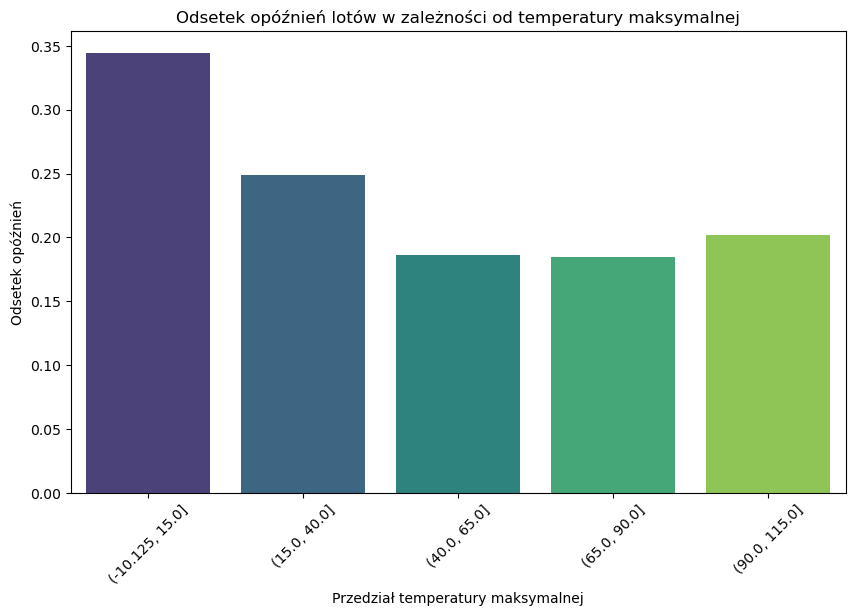

In [283]:
# 3 wizualizacja stworzonej tabeli w formie wykresu
plt.figure(figsize=(10, 6))
sns.barplot(x='Temperature Range', y='Delay Percentage', data=delay_percentage_table, palette='viridis')
plt.title('Odsetek opóźnień lotów w zależności od temperatury maksymalnej')
plt.xlabel('Przedział temperatury maksymalnej')
plt.ylabel('Odsetek opóźnień')
plt.xticks(rotation=45)
plt.show()

## Miejsce na Twój komentarz

Biorąc pod uwagę zakres temperatury a odsetek opóźnień, w analizowanych danych możemy wywnioskować, że: 
W zakresie temperatury od -10.125 do 15.0 stopni Fahrenheita odsetek opóźnień wynosi około 34.43%.
W zakresie temperatury od 15.0 do 40.0 stopni Fahrenheita odsetek opóźnień spada do około 24.85%.
W zakresie temperatury od 40.0 do 65.0 stopni Fahrenheita odsetek opóźnień zmniejsza się jeszcze bardziej, osiągając około 18.65%.
W zakresie temperatury od 65.0 do 90.0 stopni Fahrenheita odsetek opóźnień jest na podobnym poziomie, wynosząc około 18.44%.
W zakresie temperatury od 90.0 do 115.0 stopni Fahrenheita odsetek opóźnień ponownie nieznacznie rośnie, osiągając około 20.17%.


Wnioski:
Na pierwszy rzut oka może wydawać się, że bardzo niska temperatura ma związek z wyższym odsetkiem opóźnień, jednak wzrost temperatury niekoniecznie przekłada się na równomierczą redukcję opóźnień.
Najniższy odsetek opóźnień występuje w zakresie umiarkowanych temperatur (między 15.0 a 65.0 stopni Fahrenheita), co sugeruje, że ekstremalne temperatury, zarówno niskie, jak i wysokie, mogą mieć wpływ na opóźnienia.


# Podsumowanie
W tej części warsztatu dokonaliśmy kompleksowej analizy posiadanego zbioru danych. Eksploracja
pozwoliła nam na zapoznanie się z cechami charakterystycznymi lotów - wiemy już, które 
zmienne mogą mieć wpływ na opóźnienia lotów, a które nie. Co warto podkreślić, skupiliśmy się na wielu
aspektach tej analizy, co otwiera potencjalnie również inne możliwości dalszej pracy nad tą bazą.

W tym momencie przejdziemy do kolejnego kroku, w którym, na podstawie tej analizy, przygotujemy 
system raportowy. Zanim jednak stworzymy dashboard, potrzebujemy zaktualizować naszą bazę danych.

In [284]:
flight_df.to_csv('flight_df_03.csv', index=False)

In [285]:
flight_df

,id,month,day_of_month,day_of_week,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,...,destination_city_name,origin_city_name,date,station,name,prcp,snow,snwd,tmax,awnd
0,1,1,20,7,WN,N204WN,682,10397,11292,605,...,"Atlanta, GA","Denver, CO",2019-01-20,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,0.00,0.0,0.0,53.0,20.36
1,2,1,20,7,WN,N8682B,2622,10397,11292,2120,...,"Atlanta, GA","Denver, CO",2019-01-20,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,0.00,0.0,0.0,53.0,20.36
2,3,1,20,7,WN,N717SA,2939,10397,11292,1800,...,"Atlanta, GA","Denver, CO",2019-01-20,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,0.00,0.0,0.0,53.0,20.36
3,4,1,20,7,WN,N709SW,3848,10397,11292,1355,...,"Atlanta, GA","Denver, CO",2019-01-20,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,0.00,0.0,0.0,53.0,20.36
4,5,1,20,7,WN,N7864B,1352,10397,11697,1125,...,"Atlanta, GA","Fort Lauderdale, FL",2019-01-20,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,0.00,0.0,0.0,53.0,20.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057386,1382967,12,11,3,DL,N321DH,1826,13303,10397,1807,...,"Miami, FL","Atlanta, GA",2019-12-11,USW00012839,"MIAMI INTERNATIONAL AIRPORT, FL US",0.47,NaN,NaN,85.0,6.71
1057387,1382968,12,11,3,DL,N329NW,1982,13303,12953,1959,...,"Miami, FL","New York, NY",2019-12-11,USW00012839,"MIAMI INTERNATIONAL AIRPORT, FL US",0.47,NaN,NaN,85.0,6.71
1057388,1382969,12,11,3,DL,N331NW,1987,13303,10397,1125,...,"Miami, FL","Atlanta, GA",2019-12-11,USW00012839,"MIAMI INTERNATIONAL AIRPORT, FL US",0.47,NaN,NaN,85.0,6.71
1057389,1382970,12,11,3,DL,N309DN,2151,13303,12953,700,...,"Miami, FL","New York, NY",2019-12-11,USW00012839,"MIAMI INTERNATIONAL AIRPORT, FL US",0.47,NaN,NaN,85.0,6.71


In [298]:
flight_df['id'] = flight_df['id'].astype('int64')
flight_df['is_delayed'] = flight_df['is_delayed'].astype('int64')

In [299]:
flight_df['is_delayed']

0          0
1          0
2          0
3          0
4          0
          ..
1057386    0
1057387    1
1057388    0
1057389    1
1057390    0
Name: is_delayed, Length: 1057391, dtype: int64

In [301]:
flight_df.to_sql('flights_n', engine, if_exists='replace', index=False)

391